# 1022 딥러닝응용 중간고사 (2)

### using dataset: url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

1. 깃허브 자신의 계정에 수업과 숙제를 올린 소스코드만 참조가능
(그 외의 참조는 부정으로 간주 F처리)


데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

데이터 확인
print(data.head())

2) 해당 소스를 이용하여 ML 분류 RF, LR, DT
3) 해당 소스를 이용하여 FCNN
4) 해당 소스를 이용하여 CNN
5) 모든 소스에는 F1값 및 confusion matrix 표시

## 3. 해당 소스를 이용하여 FCNN

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [5]:
for i in data.columns:
    label_encoder = LabelEncoder()        
    data[i] = LabelEncoder().fit_transform(data[i])
data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [6]:
# 데이터 분류

X=data.drop('class',axis=1).values
y = pd.get_dummies(data['class']).values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.shape)
print(y.shape)

(1728, 6)
(1728, 4)


In [9]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer=Input(shape=(X_train.shape[1],))
layer1=Dense(20, activation="relu")(input_layer)
layer2=Dense(10, activation="relu")(layer1)
layer3=Dense(8, activation="relu")(layer2)
layer4=Dense(6, activation="relu")(layer3)
out_layer=Dense(y_train.shape[1], activation="softmax")(layer3)
model=Model(inputs=input_layer,outputs=out_layer)
model.compile(Adam(learning_rate=0.001),"categorical_crossentropy",metrics=["accuracy"])

# 모델 요약 출력
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474 (1.85 KB)

 Trainable params: 474 (1.85 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
n_epoch=15
history=model.fit(X_train,y_train, epochs=n_epoch, batch_size=4,validation_data= (X_test,y_test))

Epoch 1/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7170 - loss: 0.8330 - val_accuracy: 0.6898 - val_loss: 0.7889
Epoch 2/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7169 - loss: 0.7252 - val_accuracy: 0.6806 - val_loss: 0.7285
Epoch 3/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7130 - loss: 0.6567 - val_accuracy: 0.6806 - val_loss: 0.6891
Epoch 4/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7099 - loss: 0.6684 - val_accuracy: 0.6852 - val_loss: 0.6473
Epoch 5/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7198 - loss: 0.6030 - val_accuracy: 0.6968 - val_loss: 0.6127
Epoch 6/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7430 - loss: 0.5850 - val_accuracy: 0.7153 - val_loss: 0.5798
Epoch 7/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7497 - loss: 0.5358 - val_accuracy: 0.7454 - val_loss: 0.5431
Epoch 8/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7744 - loss: 0.4837 - val_accuracy: 0.

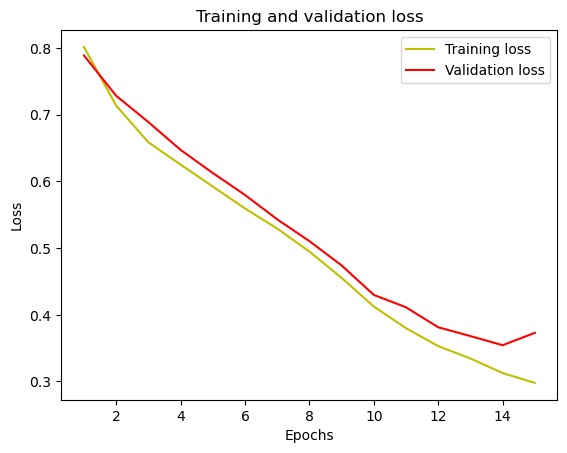

In [13]:
# 딥러닝 결과

import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.60      0.96      0.74        99
           1       0.00      0.00      0.00        21
           2       0.99      0.89      0.93       296
           3       0.62      0.31      0.42        16

    accuracy                           0.84       432
   macro avg       0.55      0.54      0.52       432
weighted avg       0.84      0.84      0.82       432

[[ 95   0   3   1]
 [ 20   0   0   1]
 [ 33   0 262   1]
 [ 11   0   0   5]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
